In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from rdd import rdd
from numpy.polynomial.polynomial import polyfit
sns.set()

df = pd.read_csv('reichstag.csv')
df.head()
df.describe()

#In this section, you will investigate whether Catholic areas of Germany were less likely 
#to support the Nazi party in the elections held in November 1932

,nsdap_share,pct_catholic,pct_jewish,pct_other_rel,pct_women,log_population,female_workforce,urban_county,unemp_white_collar,unemp_blue_collar,unemp_domestic,industry_manufacturing,industry_trade,industry_services,industry_domestic,distance_to_berlin,literacy_rate,bavaria,log_income_per_capita,religiosity
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,397.000000,982.000000,982.000000,779.000000
mean,27.768552,36.311918,0.532893,2.144964,47.220188,10.432123,37.813095,0.267821,14.961861,24.939465,10.896228,28.956254,14.157055,7.626701,3.500647,351.496692,90.178857,0.218941,7.412508,0.499358
std,11.462715,37.581153,0.939980,2.723325,13.439535,1.768615,14.213634,0.443049,6.692085,12.167682,6.102439,16.113047,10.117350,6.393117,2.327783,152.821738,9.060698,0.413739,1.938009,0.500321
min,4.313055,0.303951,0.000000,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.948739,43.146183,0.000000,0.000000,0.000000
25%,18.491055,3.570963,0.065253,0.311681,50.008022,10.202277,31.806830,0.000000,11.065729,16.157795,7.112497,16.479064,7.221122,3.817740,2.042122,227.693631,88.978836,0.000000,7.723540,0.000000
50%,27.751987,15.526534,0.257111,1.199995,50.734699,10.613480,40.114965,0.000000,15.127087,24.828549,10.471687,27.334899,10.895078,5.511930,2.869380,364.586078,93.272995,0.000000,7.853368,0.000000
75%,35.662932,79.450560,0.662945,2.865107,51.620101,11.089145,47.427110,1.000000,19.139761,33.539938,14.060931,39.769351,18.456141,9.245041,4.527771,476.610259,95.771164,0.000000,8.053254,1.000000
max,68.578972,99.758736,12.982320,19.699999,59.929920,13.891662,62.507015,1.000000,35.757217,59.834499,39.898689,77.966705,55.287445,63.493351,23.111143,683.165129,99.331673,1.000000,9.518550,1.000000


Text(0, 0.5, 'nazi % vote share')

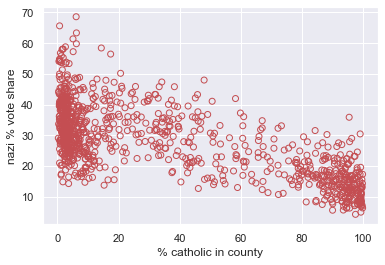

In [4]:
plt.scatter(df['pct_catholic'] , df['nsdap_share'],facecolors = 'none', edgecolors = 'r')
plt.xlabel( '% catholic in county')
plt.ylabel( 'nazi % vote share')

In [8]:
df0 = df[['nsdap_share' , 'pct_catholic']]
df0 = df0.dropna()

y0 = df0['nsdap_share']
x0 = df0['pct_catholic']
X0 = sm.add_constant(x0)
results0 = sm.OLS(y0 , X0).fit()
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nsdap_share   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     939.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          2.93e-145
Time:                        00:24:15   Log-Likelihood:                -3457.9
No. Observations:                 982   AIC:                             6920.
Df Residuals:                     980   BIC:                             6930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.5177      0.364     97.660      0.000      34.804      36.231
pct_catholic    -0.2134      0.007    -30.656      0.000      -0.227      -0.200
==============================================================================
Omnibus:                       52.659   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.391
Skew:                           0.541   Prob(JB):                     2.83e-14
Kurtosis:                       3.596   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

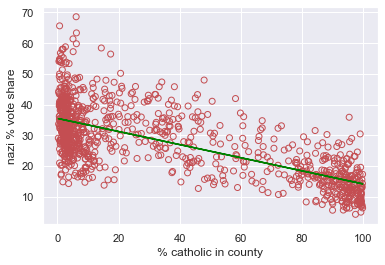

In [7]:
plt.scatter(df0['pct_catholic'], df0['nsdap_share'],facecolors = 'none', edgecolors = 'r')
plt.xlabel( '% catholic in county')
plt.ylabel( 'nazi % vote share')

xeq = df0['pct_catholic']
yeq = -0.2134 * xeq + 35.5177
b, meq = polyfit(xeq, yeq, 1)

plt.plot(xeq, b+ meq*xeq, c= 'green')


In [36]:
#MLR for nsdap_share vs %catholic + %otherrel + literacy rate + urban county

dfi = df[['nsdap_share' , 'pct_catholic', 'pct_other_rel', 'urban_county', 'literacy_rate']]
dfi = dfi.dropna()

yi = dfi['nsdap_share']
xi = dfi[['pct_catholic', 'pct_other_rel', 'urban_county', 'literacy_rate']]

Xi = sm.add_constant(xi)
resultsi = sm.OLS(yi, Xi).fit()
resultsi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nsdap_share   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     196.0
Date:                Tue, 07 Jan 2020   Prob (F-statistic):           3.97e-92
Time:                        14:51:33   Log-Likelihood:                -1310.3
No. Observations:                 397   AIC:                             2631.
Df Residuals:                     392   BIC:                             2650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            37.7450      3.360     11.234      0.000      31.139      44.351
pct_catholic     -0.2836      0.011    -26.492      0.000      -0.305      -0.263
pct_other_rel    -1.4651      0.250     -5.871      0.000      -1.956      -0.975
urban_county     -1.2273      0.996     -1.232      0.219      -3.185       0.731
literacy_rate     0.0400      0.037      1.075      0.283      -0.033       0.113
==============================================================================
Omnibus:                        9.568   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.960
Skew:                           0.382   Prob(JB):                      0.00687
Kurtosis:                       2.862   Cond. No.                         977.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

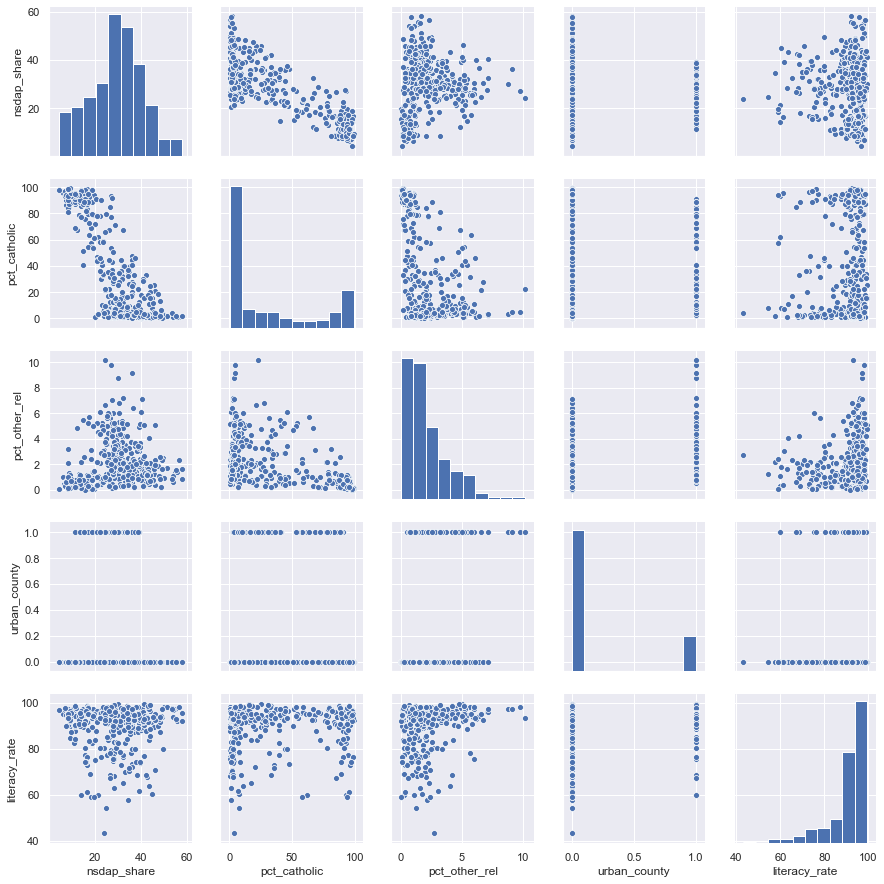

In [50]:
sns.pairplot(dfi)

#### The statistical and substantive significance of the relationships


Model 1 attempts to create a fit that predicts the nazi vote share against the percentage of catholics living within that county. 

Alternative hypothesis: Catholic areas of Germany were less likely to support the Nazi party in the elections.

Null hypothesis: Catholic areas of Germany had no effect on nsdap_share.

For Model 1 , the negative test-statistic for pct_catholic suggests that the sample mean is less than the hypothesized mean. The AH states that the true mean is less than the hypothesized, this t-statistic thus supports the alternative hypothesis. 

pct_catholic in model 1 also expresses a p-value of 0.00 indicating the statistical significance of the t-statistic.

The actual effect that pct_catholic has on nsdap_share is denoted by the intercept: 35.52, and coefficient (slope): -0.2134. This relationship illustrates that as pct_catholic increases, the nsdap_share decreases  

Model1 fit evaluation:
Its Rsquared value shows that almost half (49%) of the variability in the data is explained by the model implying that pct_catholic is a strong indicator for nsdap_share.




As far as the substanstive significance for model 1 goes, the negative slope of this relationship 
is very slight, so even though the model is somewhat reliable the slope coefficient suggests that pct_catholic does not heavily impact nsdap_share. Is expected in social sciences as it is very rare for 1 variable to explain the variability 

model2
Higher rsquared, showing that the variability of the nazi voteshare is accounted for more in model 2 than in model 1.






